In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
import xgboost as xgb
from sklearn.cluster import KMeans
import pickle


In [2]:
df = pd.read_csv('walmart_without_outliers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539096 entries, 0 to 539095
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   User_ID                        539096 non-null  int64
 1   Gender                         539096 non-null  int64
 2   Occupation                     539096 non-null  int64
 3   Marital_Status                 539096 non-null  int64
 4   Product_Category               539096 non-null  int64
 5   Purchase                       539096 non-null  int64
 6   Age_0-17                       539096 non-null  bool 
 7   Age_18-25                      539096 non-null  bool 
 8   Age_26-35                      539096 non-null  bool 
 9   Age_36-45                      539096 non-null  bool 
 10  Age_46-50                      539096 non-null  bool 
 11  Age_51-55                      539096 non-null  bool 
 12  Age_55+                        539096 non-null  bool 
 13 

In [3]:
user_id = np.unique(df['User_ID'])
train_user_id, test_user_id = train_test_split(user_id , test_size= 0.3)

In [4]:
df_train = df[df['User_ID'].isin(train_user_id)]
df_test = df[df['User_ID'].isin(test_user_id)]


In [5]:
df_train.info()
product_category = df_train['Product_Category']
purchase = df_train['Purchase']
user_id = df_train['User_ID']
df_train = df_train.drop(['User_ID', 'Purchase', 'Product_Category'] , axis = 1)

<class 'pandas.core.frame.DataFrame'>
Index: 375760 entries, 4 to 539093
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   User_ID                        375760 non-null  int64
 1   Gender                         375760 non-null  int64
 2   Occupation                     375760 non-null  int64
 3   Marital_Status                 375760 non-null  int64
 4   Product_Category               375760 non-null  int64
 5   Purchase                       375760 non-null  int64
 6   Age_0-17                       375760 non-null  bool 
 7   Age_18-25                      375760 non-null  bool 
 8   Age_26-35                      375760 non-null  bool 
 9   Age_36-45                      375760 non-null  bool 
 10  Age_46-50                      375760 non-null  bool 
 11  Age_51-55                      375760 non-null  bool 
 12  Age_55+                        375760 non-null  bool 
 13  City

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375760 entries, 4 to 539093
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   Gender                         375760 non-null  int64
 1   Occupation                     375760 non-null  int64
 2   Marital_Status                 375760 non-null  int64
 3   Age_0-17                       375760 non-null  bool 
 4   Age_18-25                      375760 non-null  bool 
 5   Age_26-35                      375760 non-null  bool 
 6   Age_36-45                      375760 non-null  bool 
 7   Age_46-50                      375760 non-null  bool 
 8   Age_51-55                      375760 non-null  bool 
 9   Age_55+                        375760 non-null  bool 
 10  City_Category_A                375760 non-null  bool 
 11  City_Category_B                375760 non-null  bool 
 12  City_Category_C                375760 non-null  bool 
 13  Stay

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


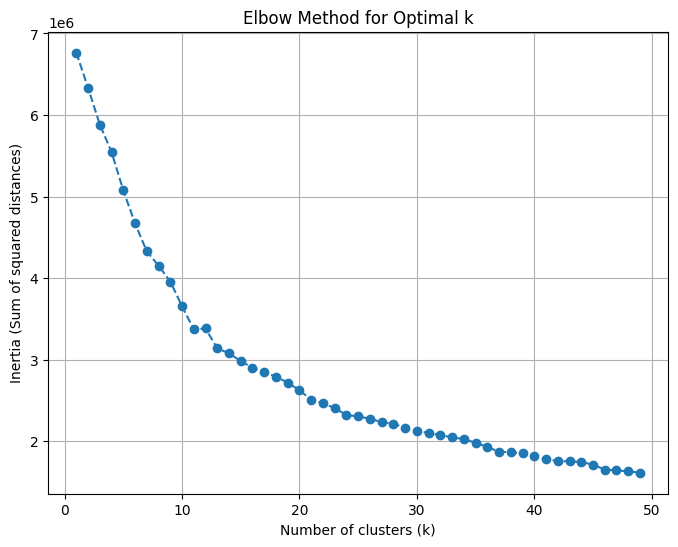

In [7]:
# applying standard scalar bcz 
# we are solving the problem through k means which more or less requires linear seperable data in nature
scalar = StandardScaler()
df_transformed = scalar.fit_transform(df_train)
inertia_values = []

k_values = range(1,50)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_transformed)
    inertia_values.append(kmeans.inertia_)
    print(k)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.grid(True)
plt.show()

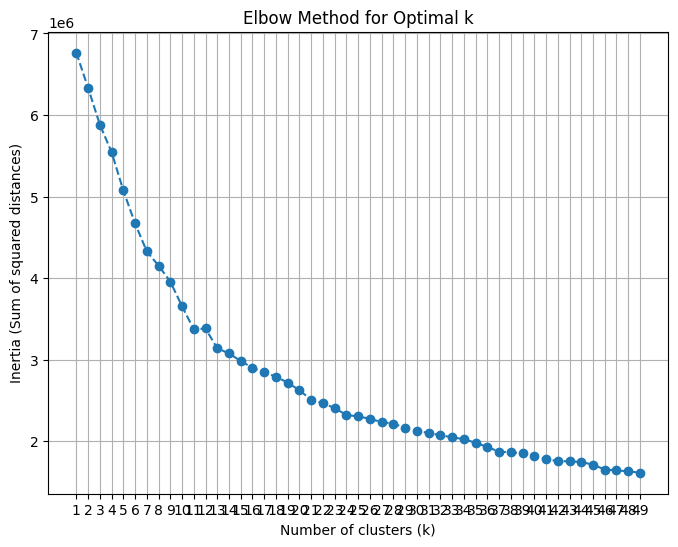

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1,50))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.grid(True)
plt.show()

From this graph, we can observe that the sharp turn comes at k = 8 ;which signifies that k should be 8 to solve the problem optimally

In [9]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(df_transformed)

KMeans(random_state=42)

In [10]:
labels = kmeans.predict(df_transformed)
df_train['clustter'] = labels
df_train['Purchase'] = purchase
df_train['Product_Category'] = product_category
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 375760 entries, 4 to 539093
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   Gender                         375760 non-null  int64
 1   Occupation                     375760 non-null  int64
 2   Marital_Status                 375760 non-null  int64
 3   Age_0-17                       375760 non-null  bool 
 4   Age_18-25                      375760 non-null  bool 
 5   Age_26-35                      375760 non-null  bool 
 6   Age_36-45                      375760 non-null  bool 
 7   Age_46-50                      375760 non-null  bool 
 8   Age_51-55                      375760 non-null  bool 
 9   Age_55+                        375760 non-null  bool 
 10  City_Category_A                375760 non-null  bool 
 11  City_Category_B                375760 non-null  bool 
 12  City_Category_C                375760 non-null  bool 
 13  Stay

In [11]:
np.unique(product_category)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 20], dtype=int64)

In [12]:
# assigning properties to each clustter
matrix = [[0] * 21 for _ in range(8)]

for i, j in df_train.iterrows():
    current_cluster = j['clustter']
    current_category = j['Product_Category']
    matrix[current_cluster][current_category] += 1

In [13]:
for i in matrix:
    print(i)

[0, 19487, 3417, 2745, 1777, 21893, 2745, 476, 16282, 47, 411, 3656, 531, 542, 251, 706, 1307, 66, 482, 0, 61]
[0, 11491, 1992, 1784, 1009, 12423, 1546, 189, 8369, 23, 175, 1949, 231, 238, 87, 345, 745, 42, 159, 0, 38]
[0, 21142, 3040, 2887, 1407, 19025, 2845, 286, 14433, 39, 429, 2991, 445, 522, 152, 623, 1159, 67, 399, 0, 106]
[0, 15006, 2546, 2255, 1281, 16896, 2147, 361, 11735, 41, 326, 2541, 367, 400, 132, 506, 964, 60, 253, 0, 48]
[0, 18480, 3103, 2510, 1516, 21658, 2915, 569, 16649, 57, 391, 3493, 472, 503, 242, 669, 1465, 48, 388, 0, 48]
[0, 2273, 570, 852, 578, 2917, 250, 27, 1540, 10, 47, 526, 82, 63, 29, 76, 129, 6, 19, 0, 12]
[0, 3087, 640, 349, 217, 3688, 579, 71, 4375, 2, 131, 397, 251, 160, 52, 121, 271, 50, 140, 0, 21]
[0, 6345, 1223, 653, 478, 6893, 1048, 183, 6618, 15, 174, 963, 310, 281, 113, 232, 431, 83, 322, 0, 32]


In [14]:
k = 5
top_k_highest_product = []

for row in matrix:
    top_k = np.argsort(row)[-k:][::-1] 
    top_k_highest_product.append(top_k.tolist())

top_k_highest_product = np.array(top_k_highest_product)
print(top_k_highest_product)


[[ 5  1  8 11  2]
 [ 5  1  8  2 11]
 [ 1  5  8  2 11]
 [ 5  1  8  2 11]
 [ 5  1  8 11  2]
 [ 5  1  8  3  4]
 [ 8  5  1  2  6]
 [ 5  8  1  2  6]]


In [15]:

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163336 entries, 0 to 539095
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   User_ID                        163336 non-null  int64
 1   Gender                         163336 non-null  int64
 2   Occupation                     163336 non-null  int64
 3   Marital_Status                 163336 non-null  int64
 4   Product_Category               163336 non-null  int64
 5   Purchase                       163336 non-null  int64
 6   Age_0-17                       163336 non-null  bool 
 7   Age_18-25                      163336 non-null  bool 
 8   Age_26-35                      163336 non-null  bool 
 9   Age_36-45                      163336 non-null  bool 
 10  Age_46-50                      163336 non-null  bool 
 11  Age_51-55                      163336 non-null  bool 
 12  Age_55+                        163336 non-null  bool 
 13  City

In [16]:
df_collect = df_test.drop('Purchase' , axis = 1)
df_collect = df_collect.drop('Product_Category' , axis = 1)
df_collect.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163336 entries, 0 to 539095
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   User_ID                        163336 non-null  int64
 1   Gender                         163336 non-null  int64
 2   Occupation                     163336 non-null  int64
 3   Marital_Status                 163336 non-null  int64
 4   Age_0-17                       163336 non-null  bool 
 5   Age_18-25                      163336 non-null  bool 
 6   Age_26-35                      163336 non-null  bool 
 7   Age_36-45                      163336 non-null  bool 
 8   Age_46-50                      163336 non-null  bool 
 9   Age_51-55                      163336 non-null  bool 
 10  Age_55+                        163336 non-null  bool 
 11  City_Category_A                163336 non-null  bool 
 12  City_Category_B                163336 non-null  bool 
 13  City

In [18]:
def actualData(userID):
    global k
    loop = df_test[df_test['User_ID'] == userID]
    info = [0]*21
    for i, j in loop.iterrows():
        info[j['Product_Category']] += 1
    ans = np.argsort(info)[-k:][::-1]
    return ans
    
def predict(userID):
    userData = df_collect[df_collect['User_ID'] == userID]
    # find the nearest centroid from this userData
    userData = userData.drop('User_ID',axis = 1)
    closest_centroid = pairwise_distances_argmin_min(userData, kmeans.cluster_centers_)[0]
    top_products = top_k_highest_product[closest_centroid]
    return top_products

testing_data = np.unique(df_collect['User_ID'])

precision = []
f1_scores = []

for i in testing_data:
    predicted_data = predict(i)
    actual_data = actualData(i)
    intersection = np.intersect1d(predicted_data, actual_data)
    
    precision_value = len(intersection) / k
    precision.append(precision_value)
    recall = len(intersection) / len(actual_data) if len(actual_data) > 0 else 0
    
    if precision_value + recall > 0:
        f1 = 2 * (precision_value * recall) / (precision_value + recall)
    else:
        f1 = 0  
    
    f1_scores.append(f1)

print("Precision : ", np.mean(precision))
mean_f1_score = np.mean(f1_scores)
print("Mean F1 Score:", mean_f1_score)


Precision :  0.7251131221719457
Mean F1 Score: 0.7251131221719457
